# Impact of computing on conventional businesses and markets

The porpuse of this reseach is evaluate how advances in computing in the last decade has impacted on existent conventional businesses and markets, As rule we will analyze industries that existed long behore computing.

### Dependencies

In [464]:
# Standard packages
import pandas as pd
import numpy as np
import re

# Installed packages
from IPython.display import display
from matplotlib import pyplot as plt
%pip install seaborn
import seaborn as sns
%pip install statsmodels
import statsmodels.api as sm
%pip install pingouin
import pingouin as pg

# Local packages
# NOTE: avoid having to use a local module to ease use of Google Colab

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Globals and constants

In [465]:
# Constants
DATE_COLUMN = 'Year'
MIN_YEAR = 2001
MAX_YEAR = 2020
DATASETS_FOLDER = './content'
SAVE_CLEANED_DATA = False

# Global state
population = None # Used to normalize data
final_dataframes = []

### Reviewing Computing Advances

Transistor information was extracted from [wikipedia transistor count](https://en.wikipedia.org/wiki/Transistor_count) using [wikitable2csv.ggor.de](https://wikitable2csv.ggor.de/) to extract the tables.

In [466]:
def ensure_date_type(df: pd.DataFrame, date_column:str=DATE_COLUMN) -> pd.DataFrame:
    """Ensure date type"""
    df[date_column] = df[date_column].astype(int)
    return df

def keep_columns(df:pd.DataFrame, columns:list) -> pd.DataFrame:
    """Keep only the specified columns"""
    return df[columns]

def date_to_year(df:pd.DataFrame, date_column:str) -> pd.DataFrame:
    """Convert DATE_COLUMN to year and rename column to 'Year'"""
    # Convert to year
    year_pattern = r'\d{4}'
    df[date_column] = df[date_column].astype(str)
    df = df[df[date_column].str.contains(year_pattern)]
    df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])
    # Rename
    if date_column != DATE_COLUMN:
        df = df.rename(columns={date_column: DATE_COLUMN})
    return df

def remove_commas(df:pd.DataFrame) -> pd.DataFrame:
    """Remove commas from all columns"""
    return df.apply(lambda x: x.str.replace(',', ''))

def convert_to_float(df:pd.DataFrame, columns:list) -> pd.DataFrame:
    """Convert the specified columns to float"""
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def cut_add_years(
        df: pd.DataFrame,
        year_column:str=DATE_COLUMN,
        min_year:int=MIN_YEAR,
        max_year:int=MAX_YEAR
        ) -> pd.DataFrame:
    """Cut the dataframe to the specified years and add missing years"""
    df = ensure_date_type(df, year_column)
    # Add missing years
    for year in range(min_year, max_year):
        if year not in df[year_column].values:
            df = pd.concat([df, pd.DataFrame.from_records([{ year_column: year }])])
    df = df.sort_values(by=[year_column]).reset_index(drop=True)
    # Cut
    df = df[(df[year_column] >= min_year) & (df[year_column] <= max_year)]
    return df

def keep_highest_per_year(
        df: pd.DataFrame,
        value_column:str,
        year_column:str=DATE_COLUMN
        ) -> pd.DataFrame:
    """Keep only the highest value for each year, useful when we want only the
       advance of a technology, so we don't care about the lower values"""
    df = df.sort_values(by=[year_column, value_column], ascending=False)
    df = df.drop_duplicates(subset=[year_column], keep='first')
    # Back to the original order
    df = df.sort_values(by=[year_column]).reset_index(drop=True)
    return df

def year_column_to_row(df:pd.DataFrame, country_row:str, new_column_name:str) -> pd.DataFrame:
    """Converts columns to rows and filters by country, useful for the world bank data datasets"""
    # Filter rows by country
    df = df[df['Country Name'] == country_row]
    # Remove columns that are not a year
    df = df[df.columns[df.columns.str.contains(r'\d{4}')]]
    # Convert columns to rows
    df = df.melt(id_vars=[], var_name=DATE_COLUMN, value_name=new_column_name)
    return df

def normalize_with_population(df:pd.DataFrame, column:str) -> pd.DataFrame:
    """Normalize the value column with the population column"""
    return df ## TODO: fix this
    assert population is not None, 'Population dataframe is not loaded'
    df[column] = np.divide(df[column], population['US Population']) * 100
    return df

Flash memory

# Original data


,Chip name,Capacity (bits),Flash type,FGMOS transistor count,Date of introduction,Manufacturer(s),Process,Area,"Transistor density, tr./mm2",Ref
19,KLMCG8GE4A,512 Gb,Stacked 2-bit NAND,"256,000,000,000",2011,Samsung,?,192 mm2,"1,333,000,000",NaN
20,KLUFG8R1EM,4 Tb,Stacked 3-bit V-NAND,"1,365,333,333,504",2017,Samsung,?,150 mm2,"9,102,000,000",NaN
21,eUFS (1 TB),8 Tb,Stacked 4-bit V-NAND,"2,048,000,000,000",2019,Samsung,?,150 mm2,"13,650,000,000",NaN
22,?,1 Tb,232L TLC NAND die,"333,333,333,333",2022,Micron,?,68.5 mm2 (memory array),"4,870,000,000 (14.6 Gbit/mm2)",NaN
23,?,16 Tb,232L package,"5,333,333,333,333",2022,Micron,?,68.5 mm2 (memory array),"77,900,000,000 (16× 14.6 Gbit/mm2)",NaN


# Cleaned data


,FGMOS transistor count,Year
14,2.560000e+11,2015
15,2.560000e+11,2016
16,1.365333e+12,2017
17,1.365333e+12,2018
18,2.048000e+12,2019


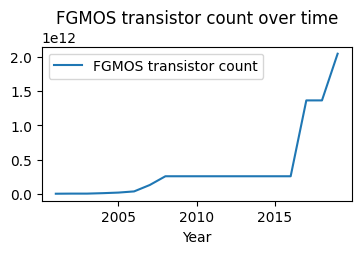

In [467]:
flash = pd.read_csv(f'{DATASETS_FOLDER}/flash.csv')
#
print('# Original data')
display(flash.tail())
#
flash = keep_columns(flash, ['FGMOS transistor count', 'Date of introduction'])
flash = date_to_year(flash, 'Date of introduction')
flash = remove_commas(flash)
flash = convert_to_float(flash, ['FGMOS transistor count'])
flash = cut_add_years(flash)
flash = keep_highest_per_year(flash, 'FGMOS transistor count')
flash = flash.fillna(method='ffill')
final_dataframes.append(flash)
#
print('# Cleaned data')
display(flash.tail())
flash.plot(x=DATE_COLUMN, y='FGMOS transistor count', title='FGMOS transistor count over time', figsize=(4, 2))
plt.show()

FPGA

# Original data


,FPGA,Transistor count,Date of introduction,Designer,Manufacturer,Process,Area,"Transistor density, tr./mm2",Ref
11,Virtex-Ultrascale VU440,"20,000,000,000",Q1 2015,Xilinx,TSMC,20 nm,NaN,NaN,NaN
12,Virtex-Ultrascale+ VU19P,"35,000,000,000",2020,Xilinx,TSMC,16 nm,900 mm2,"38,900,000",NaN
13,Versal VC1902,"37,000,000,000",2H 2019,Xilinx,TSMC,7 nm,NaN,NaN,NaN
14,Stratix 10 GX 10M,"43,300,000,000",Q4 2019,Intel,Intel,14 nm,"1,400 mm2","30,930,000",NaN
15,Versal VP1802,"92,000,000,000",2021 ?,Xilinx,TSMC,7 nm,NaN,NaN,NaN


# Cleaned data


/tmp/ipykernel_8026/1772145680.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])


,FPGA transistor count,Year
15,2.000000e+10,2016
16,2.000000e+10,2017
17,2.000000e+10,2018
18,4.330000e+10,2019
19,3.500000e+10,2020


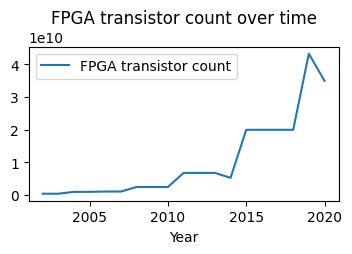

In [468]:
fpga = pd.read_csv(f'{DATASETS_FOLDER}/fpga.csv')
#
print('# Original data')
display(fpga.tail())
#
fpga = keep_columns(fpga, ['Transistor count', 'Date of introduction'])
fpga = date_to_year(fpga, 'Date of introduction')
fpga = remove_commas(fpga)
fpga = convert_to_float(fpga, ['Transistor count'])
fpga = cut_add_years(fpga)
fpga = fpga.rename(columns={'Transistor count': 'FPGA transistor count'})
fpga = keep_highest_per_year(fpga, 'FPGA transistor count')
fpga = fpga.fillna(method='ffill')
final_dataframes.append(fpga)
#
print('# Cleaned data')
display(fpga.tail())
fpga.plot(x=DATE_COLUMN, y='FPGA transistor count', title='FPGA transistor count over time', figsize=(4, 2))
plt.show()

GPU

# Original data


,Processor,Transistor count,Year,Designer(s),Fab(s),Process,Area,"Transistor density, tr./mm2",Ref
158,AD102 Ada Lovelace,"76,300,000,000",2022,Nvidia,TSMC,4 nm,608.4 mm²,"125,411,000",NaN
159,AD103 Ada Lovelace,"45,900,000,000",2022,Nvidia,TSMC,4 nm,378.6 mm²,"121,240,000",NaN
160,AD104 Ada Lovelace,"35,800,000,000",2022,Nvidia,TSMC,4 nm,294.5 mm²,"121,560,000",NaN
161,Navi 31 RDNA3,"58,000,000,000",2022,AMD,TSMC,5 nm (GCD) 6 nm (MCD),531 mm² (MCM) 306 mm² (GCD) 6×37.5 mm² (MCD),"109,200,000 (MCM) 132,400,000 (GCD)",NaN
162,Navi 33 RDNA3,"13,300,000,000",2023,AMD,TSMC,6 nm,204 mm²,"65,200,000",NaN


# Cleaned data


,GPU transistor count,Year
15,1.530000e+10,2016
16,2.110000e+10,2017
17,1.860000e+10,2018
18,1.030000e+10,2019
19,5.420000e+10,2020


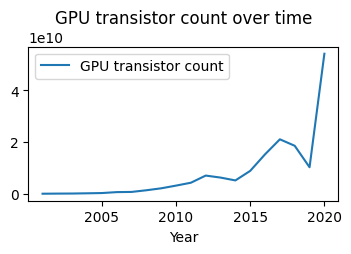

In [469]:
gpus = pd.read_csv(f'{DATASETS_FOLDER}/gpus.csv')
#
print('# Original data')
display(gpus.tail())
#
gpus = keep_columns(gpus, ['Transistor count', 'Year'])
gpus = date_to_year(gpus, 'Year')
gpus = remove_commas(gpus)
gpus = convert_to_float(gpus, ['Transistor count'])
gpus = cut_add_years(gpus)
gpus = gpus.rename(columns={'Transistor count': 'GPU transistor count'})
gpus = keep_highest_per_year(gpus, 'GPU transistor count')
gpus = gpus.fillna(method='ffill')
final_dataframes.append(gpus)
#
print('# Cleaned data')
display(gpus.tail())
gpus.plot(x='Year', y='GPU transistor count', title='GPU transistor count over time', figsize=(4, 2))
plt.show()

Microprocessor

# Original data


,Processor,Transistor count,Year,Designer,Process\n(nm),Area (mm2),"Transistor density, tr./mm2"
229,AMD EPYC Genoa (4th gen/9004 series) 13-chip m...,"90,000,000,000",2022,AMD,5 nm (CCD)\n6 nm (IOD),"1,263.34 mm²\n12×72.225 (CCD)\n396.64 (IOD)","71,240,000"
230,Sapphire Rapids quad-chip module (up to 60 cor...,"44,000,000,000–48,000,000,000",2023,Intel,Intel 7 (10 nm ESF),"1,600 mm2","27,500,000–\n30,000,000"
231,"Apple M2 Pro (12-core 64-bit ARM64 SoC, SIMD, ...","40,000,000,000",2023,Apple,5 nm,?,?
232,"Apple M2 Max (12-core 64-bit ARM64 SoC, SIMD, ...","67,000,000,000",2023,Apple,5 nm,?,?
233,Processor,Transistor count,Year,Designer,Process\n(nm),Area (mm2),"Transistor density, tr./mm2"


# Cleaned data


/tmp/ipykernel_8026/1772145680.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])


,Microprocessor transistor count,Year
15,8000000000,2016
16,19200000000,2017
17,10000000000,2018
18,39540000000,2019
19,16000000000,2020


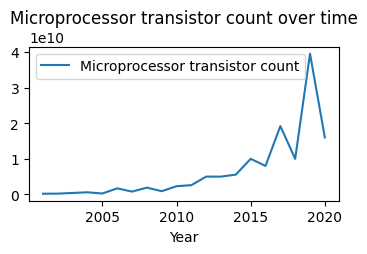

In [470]:
microprocessors = pd.read_csv(f'{DATASETS_FOLDER}/microprocessors.csv')
#
print('# Original data')
display(microprocessors.tail())
#
microprocessors = keep_columns(microprocessors, ['Transistor count', 'Year'])
microprocessors = date_to_year(microprocessors, 'Year')
microprocessors = remove_commas(microprocessors)
microprocessors = microprocessors[microprocessors['Transistor count'].str.contains(r'^\d+$')]
microprocessors = convert_to_float(microprocessors, ['Transistor count'])
microprocessors = microprocessors.rename(columns={'Transistor count': 'Microprocessor transistor count'})
microprocessors = cut_add_years(microprocessors)
microprocessors = keep_highest_per_year(microprocessors, 'Microprocessor transistor count')
microprocessors = microprocessors.fillna(method='ffill')
final_dataframes.append(microprocessors)
#
print('# Cleaned data')
display(microprocessors.tail())
microprocessors.plot(x='Year', y='Microprocessor transistor count', title='Microprocessor transistor count over time', figsize=(4, 2))
plt.show()


RAM

Note that we will drop this dataset because contains a lot of NaN values

# Original data


,Chip name,Capacity (bits),RAM type,Transistor count,Date of introduction,Manufacturer(s),Process,Area,"Transistor density, tr./mm2",Ref
43,?,16 Gb,SDRAM (DDR3),"17,179,869,184",2008,Samsung,50 nm,?,?,NaN
44,?,32 Gb,SDRAM (HBM2),"34,359,738,368",2016,Samsung,20 nm,?,?,NaN
45,?,64 Gb,SDRAM (HBM2),"68,719,476,736",2017,Samsung,20 nm,?,?,NaN
46,?,128 Gb,SDRAM (DDR4),"137,438,953,472",2018,Samsung,10 nm,?,?,NaN
47,?,?,RRAM (3DSoC),?,2019,SkyWater Technology,90 nm,?,?,NaN


# Cleaned data


,Year,RAM transistor count
14,2015,1.717987e+10
15,2016,3.435974e+10
16,2017,6.871948e+10
17,2018,1.374390e+11
18,2019,1.374390e+11


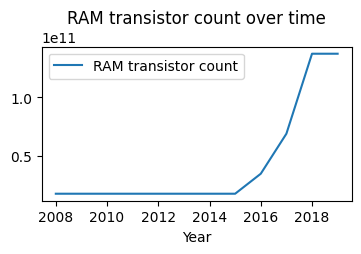

In [471]:
ram = pd.read_csv(f'{DATASETS_FOLDER}/ram.csv')
#
print('# Original data')
display(ram.tail())
#
ram = keep_columns(ram, ['Date of introduction', 'Transistor count'])
ram = date_to_year(ram, 'Date of introduction')
ram = remove_commas(ram)
ram = convert_to_float(ram, ['Transistor count'])
ram = ram.rename(columns={'Transistor count': 'RAM transistor count'})
ram = cut_add_years(ram)
ram = keep_highest_per_year(ram, 'RAM transistor count')
ram = ram.fillna(method='ffill')
# BAD: final_dataframes.append(ram) this dataset has a lot of Nan values
# show
print('# Cleaned data')
display(ram.tail())
ram.plot(x='Year', y='RAM transistor count', title='RAM transistor count over time', figsize=(4, 2))
plt.show()

ROM

Note that we will drop this data since this lack of data from 2000s up to now

# Original data


,Chip name,Capacity (bits),ROM type,Transistor count,Date of introduction,Manufacturer(s),Process,Area,Ref
17,27512,512 Kb,EPROM (HMOS),"524,288",1984,Intel,?,?,NaN
18,?,1 Mb,EPROM (CMOS),"1,048,576",1984,NEC,"1,200 nm",?,NaN
19,?,4 Mb,EPROM (CMOS),"4,194,304",1987,Toshiba,800 nm,?,NaN
20,?,16 Mb,EPROM (CMOS),"16,777,216",1990,NEC,600 nm,?,NaN
21,?,16 Mb,MROM,"16,777,216",1995,"AKM, Hitachi",?,?,NaN


# Cleaned data


,Year,ROM transistor count
14,2015,NaN
15,2016,NaN
16,2017,NaN
17,2018,NaN
18,2019,NaN


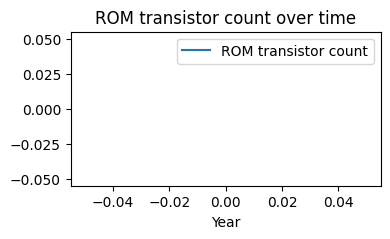

In [472]:
rom = pd.read_csv(f'{DATASETS_FOLDER}/rom.csv')
#
print('# Original data')
display(rom.tail())
#
rom = keep_columns(rom, ['Date of introduction', 'Transistor count'])
rom = date_to_year(rom, 'Date of introduction')
rom = remove_commas(rom)
rom = convert_to_float(rom, ['Transistor count'])
rom = rom.rename(columns={'Transistor count': 'ROM transistor count'})
rom = cut_add_years(rom)
rom = keep_highest_per_year(rom, 'ROM transistor count')
rom = rom.fillna(method='ffill')
# BAD: final_dataframes.append(rom) this lacks data from 2000 up to now
# show
print('# Cleaned data')
display(rom.tail())
rom.plot(x='Year', y='ROM transistor count', title='ROM transistor count over time', figsize=(4, 2))
plt.show()

Internet

# Original data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
261,Kosovo,XKX,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.893597,89.443032,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.55000,24.085409,24.579208,26.718355,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.00000,51.919116,54.000000,56.167394,62.400000,69.696875,70.320310,72.310492,NaN,NaN
264,Zambia,ZMB,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50000,8.800000,10.300000,12.200000,14.299997,16.800000,18.051915,21.231531,NaN,NaN
265,Zimbabwe,ZWE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.36474,22.742818,23.119989,24.400000,25.000000,26.588274,29.298565,34.813971,NaN,NaN


# Cleaned data


,Year,US internet percentage
56,2016,85.544421
57,2017,87.274889
58,2018,88.498903
59,2019,89.430285
60,2020,90.620470


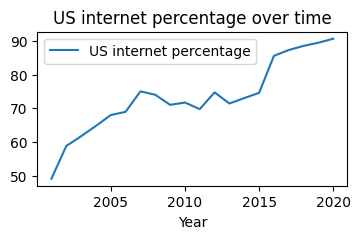

In [473]:
internet = pd.read_csv(f'{DATASETS_FOLDER}/theworldbank_internet.csv')
#
print('# Original data')
display(internet.tail())
#
internet = year_column_to_row(internet, 'United States', 'US internet percentage')
internet = cut_add_years(internet)
final_dataframes.append(internet)
#
print('# Cleaned data')
display(internet.tail())
internet.plot(x='Year', y='US internet percentage', title='US internet percentage over time', figsize=(4, 2))
plt.show()

In [474]:
## TODO: add phones related data

In [475]:
## TODO: add AI related data

In [476]:
## TODO: add SSD related data

### Reviewing the United States economy

Population, GDP and internet datasets were obtained from [worldbank.org](https://data.worldbank.org/).

Population

# Original data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,NaN
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,...,13555422.0,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,NaN


# Cleaned data


,Year,US Population
56,2016,323071755.0
57,2017,325122128.0
58,2018,326838199.0
59,2019,328329953.0
60,2020,331501080.0


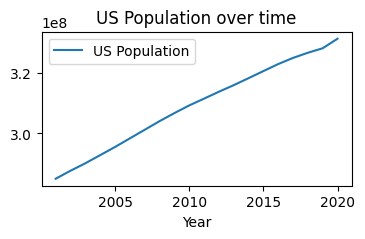

In [477]:
population = pd.read_csv(f'{DATASETS_FOLDER}/theworldbank_population.csv')
#
print('# Original data')
display(population.tail())
#
population = year_column_to_row(population, 'United States', 'US Population')
population = cut_add_years(population)
# BAD: final_dataframes.append(population) we use population to normalize other dataframes
#
print('# Cleaned data')
display(population.tail())
population.plot(x='Year', y='US Population', title='US Population over time', figsize=(4, 2))
plt.show()

GDP

# Original data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041597e+11,3.885320e+11,3.376197e+11,4.190150e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10,NaN
265,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,3.415607e+10,2.183223e+10,2.150970e+10,2.837124e+10,NaN


# Cleaned data


,Year,US GDP
56,2016,1.869511e+13
57,2017,1.947734e+13
58,2018,2.053306e+13
59,2019,2.138098e+13
60,2020,2.106047e+13


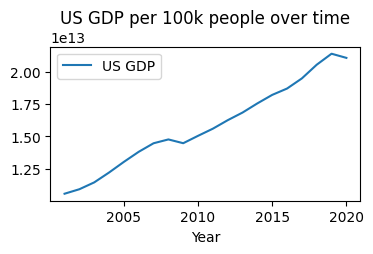

In [478]:
gdp = pd.read_csv(f'{DATASETS_FOLDER}/theworldbank_gdp.csv')
#
print('# Original data')
display(gdp.tail())
#
gdp = year_column_to_row(gdp, 'United States', 'US GDP')
gdp = cut_add_years(gdp)
gdp = normalize_with_population(gdp, 'US GDP')
final_dataframes.append(gdp)
#
print('# Cleaned data')
display(gdp.tail())
gdp.plot(x='Year', y='US GDP', title='US GDP per 100k people over time', figsize=(4, 2))
plt.show()

### Reviewing real estate sales

US 2001-2020 real state sales dataset was obtained from [data.gov](https://catalog.data.gov/dataset/real-estate-sales-2001-2018).

In [479]:
real_estate_sales = pd.read_csv(f'{DATASETS_FOLDER}/real_estate_sales.csv')
#
print('# Original data')
display(real_estate_sales.tail())
#
real_estate_sales = keep_columns(real_estate_sales, [
    'Date Recorded', 'Sale Amount', 'Property Type', 'Residential Type',
    ])
# Save cleaned data because github doesn't allow files larger than 100MB
if SAVE_CLEANED_DATA:
    real_estate_sales.to_csv(f'{DATASETS_FOLDER}/real_estate_sales.csv', index=False)
real_estate_sales = date_to_year(real_estate_sales, 'Date Recorded')
#
print('# Cleaned data')
display(real_estate_sales.tail())


# Original data


/tmp/ipykernel_8026/65819919.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_sales = pd.read_csv(f'{DATASETS_FOLDER}/real_estate_sales.csv')


,Date Recorded,Sale Amount,Property Type,Residential Type
997208,06/24/2020,53100.0,Single Family,Single Family
997209,11/27/2019,76000.0,Single Family,Single Family
997210,04/27/2020,210000.0,Single Family,Single Family
997211,06/03/2020,280000.0,Single Family,Single Family
997212,12/20/2019,7450000.0,NaN,NaN


# Cleaned data


/tmp/ipykernel_8026/1772145680.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])


,Year,Sale Amount,Property Type,Residential Type
997208,2020,53100.0,Single Family,Single Family
997209,2019,76000.0,Single Family,Single Family
997210,2020,210000.0,Single Family,Single Family
997211,2020,280000.0,Single Family,Single Family
997212,2019,7450000.0,NaN,NaN


Sales per year

,Year,re sales
1,2001,60207
2,2002,56317
3,2003,73943
4,2004,79566
5,2005,57250
6,2006,46138
7,2007,34195
8,2008,36305
9,2009,39128
10,2010,32088


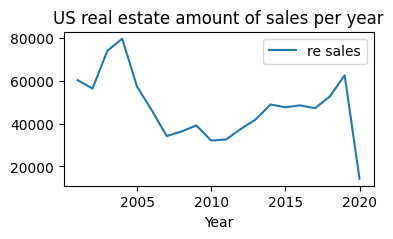

In [480]:
# Calculate
re_sales_per_year = pd.DataFrame()
re_sales_per_year['Year'] = real_estate_sales[DATE_COLUMN].unique()
re_sales_per_year = ensure_date_type(re_sales_per_year)
re_sales_per_year['re sales'] = real_estate_sales.groupby(DATE_COLUMN).size().values
re_sales_per_year = cut_add_years(re_sales_per_year)
re_sales_per_year = re_sales_per_year.fillna(method='ffill')
re_sales_per_year = normalize_with_population(re_sales_per_year, 're sales')
final_dataframes.append(re_sales_per_year)
# Show
display(re_sales_per_year)
re_sales_per_year.plot(
    x=DATE_COLUMN,
    y='re sales',
    title='US real estate amount of sales per year',
    figsize=(4, 2)
    )
plt.show()

Invested per year

,Year,re investment
1,2001,1.560357e+10
2,2002,1.720434e+10
3,2003,2.516201e+10
4,2004,3.021333e+10
5,2005,2.159822e+10
6,2006,2.222218e+10
7,2007,1.412136e+10
8,2008,1.177615e+10
9,2009,1.383911e+10
10,2010,1.104590e+10


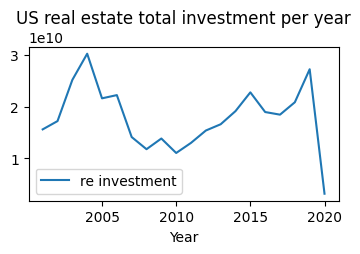

In [481]:
# Calculate
re_investment_per_year = pd.DataFrame()
re_investment_per_year['Year'] = real_estate_sales[DATE_COLUMN].unique()
re_investment_per_year = ensure_date_type(re_investment_per_year)
re_investment_per_year['re investment'] = real_estate_sales.groupby(DATE_COLUMN)['Sale Amount'].sum().values
re_investment_per_year = cut_add_years(re_investment_per_year)
re_investment_per_year = normalize_with_population(re_investment_per_year, 're investment')
final_dataframes.append(re_investment_per_year)
# Show
display(re_investment_per_year)
re_investment_per_year.plot(
    x=DATE_COLUMN,
    y='re investment',
    title='US real estate total investment per year',
    figsize=(4, 2)
    )
plt.show()

Investment per type per year

In [482]:
def get_types(df:pd.DataFrame, column:str) -> list:
    types = df[column].unique()
    types = [str(x) for x in types]
    return types
def print_types(df: pd.DataFrame, column:str) -> None:
    types = get_types(df, column)
    for i, x in enumerate(types):
        print(f'{i+1}.\t{x}')
print('Real estate properties types:')
print_types(real_estate_sales, 'Property Type')
print()
print('Real estate residential types:')
print_types(real_estate_sales, 'Residential Type')

Real estate properties types:
1.	Commercial
2.	Residential
3.	Vacant Land
4.	nan
5.	Apartments
6.	Industrial
7.	Public Utility
8.	Condo
9.	Two Family
10.	Three Family
11.	Single Family
12.	Four Family

Real estate residential types:
1.	nan
2.	Single Family
3.	Condo
4.	Two Family
5.	Three Family
6.	Four Family


<Axes: title={'center': 'Residential types'}, ylabel='Residential Type'>

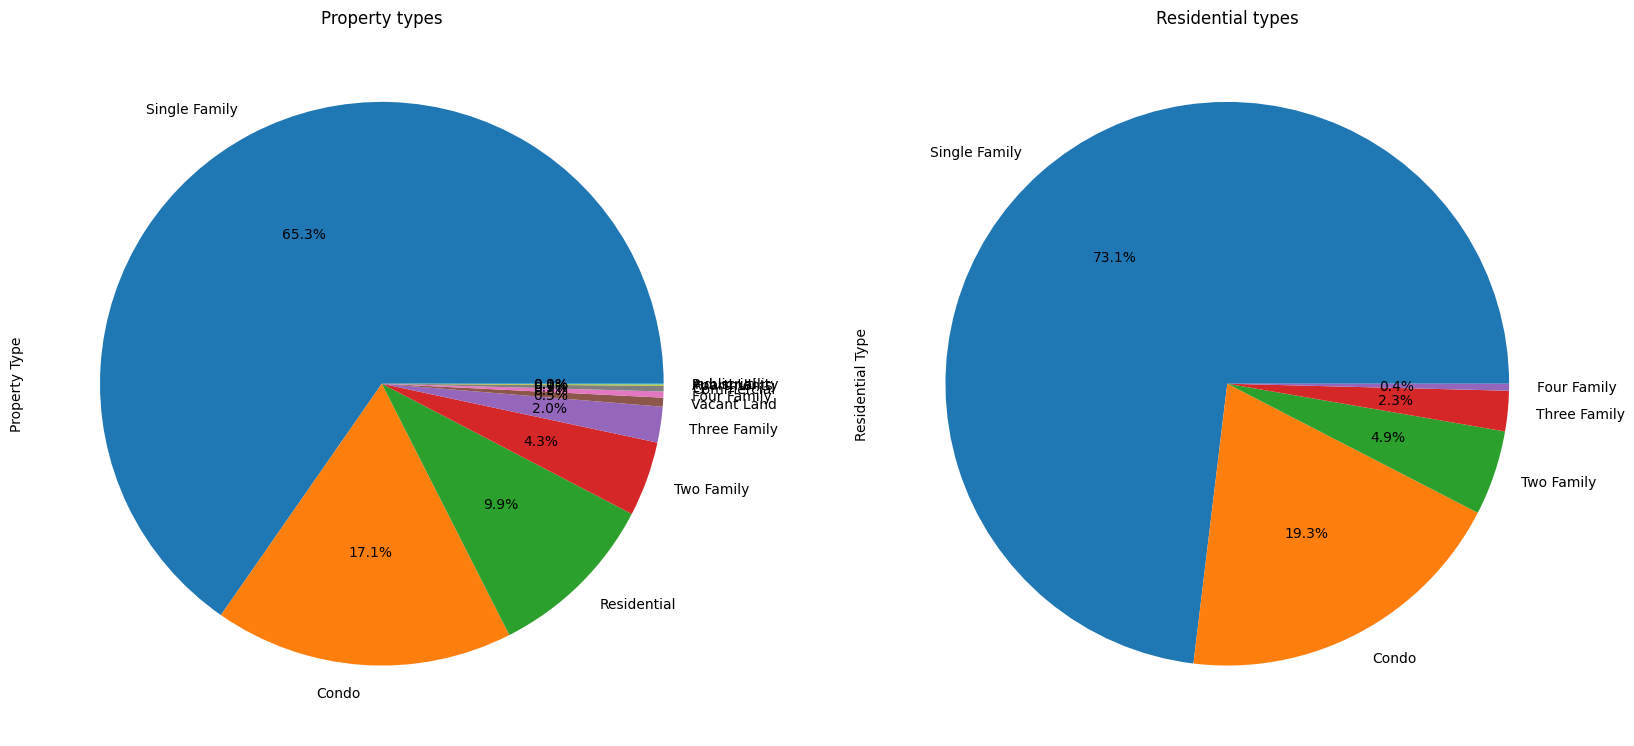

In [483]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
real_estate_sales['Property Type'] \
    .value_counts(normalize=True).plot.pie(autopct='%1.1f%%', title='Property types', ax=axs[0])
real_estate_sales['Residential Type'] \
    .value_counts(normalize=True).plot.pie(autopct='%1.1f%%', title='Residential types', ax=axs[1])

,Year,re CONDO property type investment,re TWO FAMILY property type investment,re THREE FAMILY property type investment,re SINGLE FAMILY property type investment,re FOUR FAMILY property type investment
0,1999,9.500000e+04,0.000000e+00,0,0.000000e+00,0
1,2001,8.800000e+04,0.000000e+00,0,2.402711e+06,0
2,2002,0.000000e+00,0.000000e+00,0,0.000000e+00,0
3,2003,0.000000e+00,0.000000e+00,0,1.589000e+05,0
4,2004,6.329000e+05,0.000000e+00,0,1.949900e+06,0
5,2005,2.770000e+05,2.640000e+05,0,0.000000e+00,0
6,2006,5.948589e+08,1.603019e+08,86599217,3.210213e+09,10182700
7,2007,2.423580e+09,5.385773e+08,228334313,1.455175e+10,25293008
8,2008,1.571634e+09,3.353331e+08,134461433,9.249377e+09,23560218
9,2009,1.533074e+09,2.929898e+08,115687933,8.241461e+09,21736964


,Year,re SINGLE FAMILY residential type investment,re CONDO residential type investment,re TWO FAMILY residential type investment,re THREE FAMILY residential type investment,re FOUR FAMILY residential type investment
0,1999,0.000000e+00,9.500000e+04,0.000000e+00,0.000000e+00,0
1,2001,2.402711e+06,8.800000e+04,0.000000e+00,0.000000e+00,0
2,2002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3,2003,1.589000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0
4,2004,1.949900e+06,6.329000e+05,0.000000e+00,0.000000e+00,0
5,2005,0.000000e+00,2.770000e+05,2.640000e+05,0.000000e+00,0
6,2006,3.210213e+09,5.948589e+08,1.603019e+08,8.659922e+07,10182700
7,2007,1.455175e+10,2.423580e+09,5.385773e+08,2.283343e+08,25293008
8,2008,9.249377e+09,1.571634e+09,3.353331e+08,1.344614e+08,23560218
9,2009,8.241461e+09,1.533074e+09,2.929898e+08,1.156879e+08,21736964


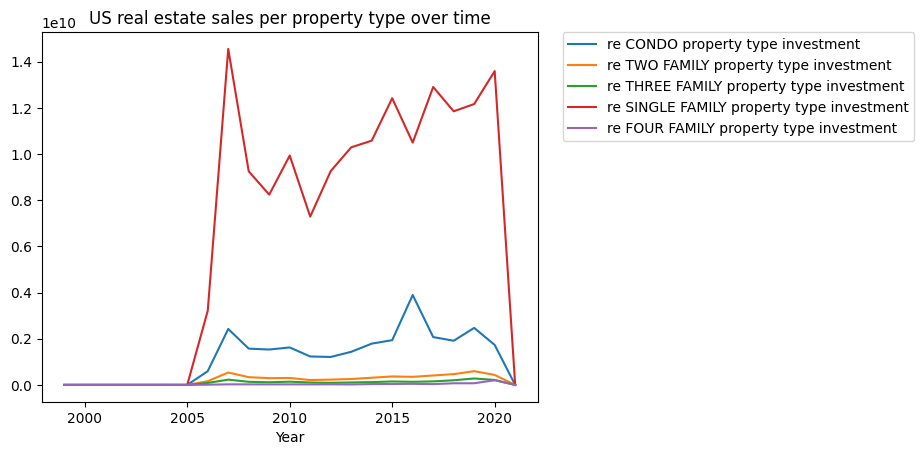

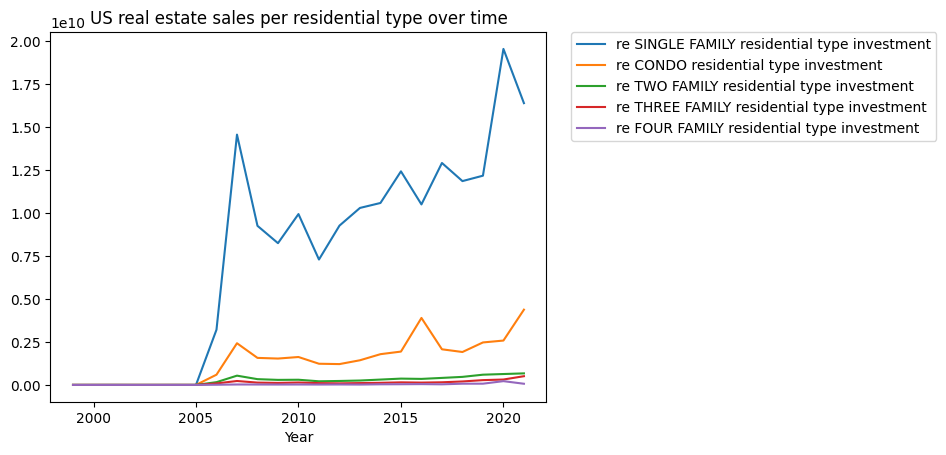

In [484]:
def groupby_type_and_year(df:pd.DataFrame, column:str) -> pd.DataFrame:
    result = pd.DataFrame()
    result['Year'] = real_estate_sales[DATE_COLUMN].unique()
    result = result.sort_values(by=DATE_COLUMN).reset_index(drop=True)
    #
    result = ensure_date_type(result)
    df = ensure_date_type(df)
    #
    for type in get_types(df, column):
        new_column_name = f're {type.upper()} {column.lower()} investment'
        result[new_column_name] = 0
        for year in result[DATE_COLUMN]:
            sales_amount = df[(df[column] == type) & (df[DATE_COLUMN] == year)]['Sale Amount'].sum()
            result.loc[result[DATE_COLUMN] == year, new_column_name] = sales_amount
        result = normalize_with_population(result, new_column_name)
    return result

property_types_annual = groupby_type_and_year(real_estate_sales, 'Property Type')
residential_types_annual = groupby_type_and_year(real_estate_sales, 'Residential Type')

# Drop columns with lot of zeros.
property_types_annual = keep_columns(property_types_annual, [
    DATE_COLUMN,
    're CONDO property type investment',
    're TWO FAMILY property type investment',
    're THREE FAMILY property type investment',
    're SINGLE FAMILY property type investment',
    're FOUR FAMILY property type investment',
])
residential_types_annual = keep_columns(residential_types_annual, [
    DATE_COLUMN,
    're SINGLE FAMILY residential type investment',
    're CONDO residential type investment',
    're TWO FAMILY residential type investment',
    're THREE FAMILY residential type investment',
    're FOUR FAMILY residential type investment',
])

final_dataframes.append(property_types_annual)
final_dataframes.append(residential_types_annual)

display(property_types_annual)
display(residential_types_annual)

# Show property types
property_types_annual.plot(
    x=DATE_COLUMN,
    y=property_types_annual.columns[1:],
    title='US real estate sales per property type over time',
    )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Show residential types
residential_types_annual.plot(
    x=DATE_COLUMN,
    y=residential_types_annual.columns[1:],
    title='US real estate sales per residential type over time',
    )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Reviewing the U.S. crude oil production

U.S. field production of crude oil data were obtained from [U.S. Energy Information Administration](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=mcrfpus2&f=m).

# Original data


,Year,U.S. Field Production of Crude Oil Thousand Barrels per Day
159,1863,7
160,1862,8
161,1861,6
162,1860,1
163,1859,0


# Cleaned data


,Year,Crude Oil Production
142,2001,5801
143,2002,5744
144,2003,5649
145,2004,5441
146,2005,5184
147,2006,5086
148,2007,5074
149,2008,5000
150,2009,5357
151,2010,5484


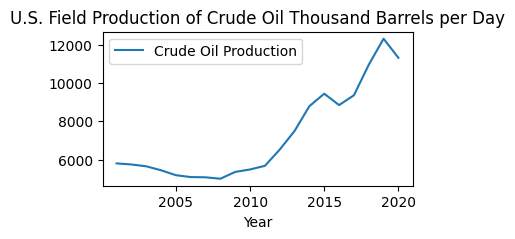

In [485]:
crude = pd.read_csv(f'{DATASETS_FOLDER}/U.S._Field_Production_of_Crude_Oil.csv')
#
print('# Original data')
display(crude.tail())
#
crude = cut_add_years(crude)
crude = crude.rename(columns={
    'U.S. Field Production of Crude Oil Thousand Barrels per Day': 'Crude Oil Production',
})
crude = normalize_with_population(crude, 'Crude Oil Production')
final_dataframes.append(crude)
#
print('# Cleaned data')
display(crude)
crude.plot(x='Year', y='Crude Oil Production', title='U.S. Field Production of Crude Oil Thousand Barrels per Day', figsize=(4, 2))
plt.show()

### Reviewing the car sales

Total vehicle sales dataset were obtained from [fred.stlouisfed.org](https://fred.stlouisfed.org/series/TOTALSA).

# Original data


,DATE,TOTALSA
563,2022-12-01,13.875
564,2023-01-01,16.455
565,2023-02-01,15.438
566,2023-03-01,15.326
567,2023-04-01,16.477


# Cleaned data


/tmp/ipykernel_8026/964702540.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  car_sales = car_sales.groupby(car_sales['DATE'].str[:4]).sum().reset_index()


,Year,US car sales
25,2001,209.665
26,2002,205.658
27,2003,203.597
28,2004,207.550
29,2005,209.354
30,2006,204.591
31,2007,197.545
32,2008,161.917
33,2009,127.217
34,2010,141.265


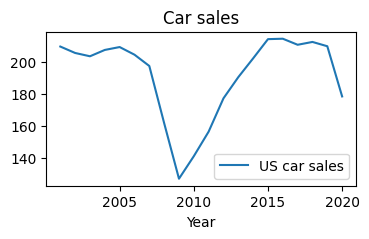

In [486]:
car_sales = pd.read_csv(f'{DATASETS_FOLDER}/car_sales.csv')
#
print('# Original data')
display(car_sales.tail())
# Cleaning
car_sales = car_sales.groupby(car_sales['DATE'].str[:4]).sum().reset_index()
car_sales = date_to_year(car_sales, 'DATE')
car_sales = cut_add_years(car_sales)
car_sales = car_sales.rename(columns={'TOTALSA': 'US car sales'})
car_sales = normalize_with_population(car_sales, 'US car sales')
# BAD: final_dataframes.append(car_sales) this dataset lacks of data from 2000+
#
print('# Cleaned data')
display(car_sales)
car_sales.plot(x='Year', y='US car sales', title='Car sales', figsize=(4, 2))
plt.show()

### Reviewing book publishing

Book dataset were obtained from [scostap - Goodreads Best Book Ever dataset](https://github.com/scostap/goodreads_bbe_dataset)

In [489]:
book = pd.read_csv(f'{DATASETS_FOLDER}/books_1.Best_Books_Ever.csv')
#
print('# Original data')
display(book.tail())
#
book = keep_columns(book, [
    'bookFormat', 'pages', 'publishDate', 'rating', 'likedPercent', 'price'
    ])
book = book.dropna()
# Format date
book = book[book['publishDate'].str.match(r'\d{1,2}/\d{1,2}/\d{2}')]
book['publishDate'] = pd.to_datetime(book['publishDate'],format="%m/%d/%y")
book['publishDate'] = book['publishDate'].dt.strftime('%Y-%m-%d')
# Format price
book = book[pd.to_numeric(book['price'], errors='coerce').notnull()]
book['price'] = book['price'].astype(float)
#
print('# Cleaned data')
display(book.tail())
display(book.describe())

# Original data


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],...,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],...,NaN,[],246,"['106', '73', '42', '17', '8']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


# Cleaned data


,bookFormat,pages,publishDate,rating,likedPercent,price
814,Mass Market Paperback,357,2008-04-29,4.30,97.0,2.86
815,Paperback,515,2005-09-22,3.65,86.0,2.86
816,Paperback,416,2001-02-01,4.17,95.0,3.55
818,Hardcover,516,2014-10-07,4.41,97.0,6.52
819,Hardcover,528,2010-04-27,4.40,97.0,6.50


,rating,likedPercent,price
count,657.000000,657.000000,657.000000
mean,4.076514,92.576865,6.025403
std,0.233532,3.742140,7.746120
min,3.410000,78.000000,0.850000
25%,3.930000,91.000000,2.900000
50%,4.060000,93.000000,4.180000
75%,4.230000,95.000000,6.270000
max,4.820000,99.000000,110.670000


### Merging all datasets by year

In [ ]:
merged_df = pd.DataFrame()
merged_df[DATE_COLUMN] = final_dataframes[0][DATE_COLUMN].unique()
merged_df = ensure_date_type(merged_df)
# Merge dataframes
for df in final_dataframes:
    df = ensure_date_type(df)
    merged_df = pd.merge(merged_df, df, on=DATE_COLUMN, how='outer')
merged_df = cut_add_years(merged_df)
# Show all years to see if any cell is wrong
merged_df

,Year,FGMOS transistor count,FPGA transistor count,GPU transistor count,Microprocessor transistor count,US internet percentage,US GDP,re sales,re investment,re CONDO property type investment,re TWO FAMILY property type investment,re THREE FAMILY property type investment,re SINGLE FAMILY property type investment,re FOUR FAMILY property type investment,re SINGLE FAMILY residential type investment,re CONDO residential type investment,re TWO FAMILY residential type investment,re THREE FAMILY residential type investment,re FOUR FAMILY residential type investment,Crude Oil Production
1,2001,5.368709e+08,NaN,6.000000e+07,1.910000e+08,49.080832,1.058193e+13,60207.0,1.560357e+10,8.800000e+04,0.000000e+00,0,2.402711e+06,0,2.402711e+06,8.800000e+04,0.000000e+00,0.0,0,5801.0
2,2002,2.147484e+09,4.300000e+08,1.070000e+08,2.200000e+08,58.785404,1.092911e+13,56317.0,1.720434e+10,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,5744.0
3,2003,2.147484e+09,4.300000e+08,1.350000e+08,4.100000e+08,61.697117,1.145644e+13,73943.0,2.516201e+10,0.000000e+00,0.000000e+00,0,1.589000e+05,0,1.589000e+05,0.000000e+00,0.000000e+00,0.0,0,5649.0
4,2004,8.589935e+09,1.000000e+09,2.220000e+08,5.920000e+08,64.758256,1.221719e+13,79566.0,3.021333e+10,6.329000e+05,0.000000e+00,0,1.949900e+06,0,1.949900e+06,6.329000e+05,0.000000e+00,0.0,0,5441.0
5,2005,1.717987e+10,1.000000e+09,3.210000e+08,2.500000e+08,67.968053,1.303920e+13,57250.0,2.159822e+10,2.770000e+05,2.640000e+05,0,0.000000e+00,0,0.000000e+00,2.770000e+05,2.640000e+05,0.0,0,5184.0
6,2006,3.435974e+10,1.100000e+09,6.810000e+08,1.700000e+09,68.931193,1.381559e+13,46138.0,2.222218e+10,5.948589e+08,1.603019e+08,86599217,3.210213e+09,10182700,3.210213e+09,5.948589e+08,1.603019e+08,86599217.0,10182700,5086.0
7,2007,1.280000e+11,1.100000e+09,7.540000e+08,7.890000e+08,75.000000,1.447423e+13,34195.0,1.412136e+10,2.423580e+09,5.385773e+08,228334313,1.455175e+10,25293008,1.455175e+10,2.423580e+09,5.385773e+08,228334313.0,25293008,5074.0
8,2008,2.560000e+11,2.500000e+09,1.400000e+09,1.900000e+09,74.000000,1.476986e+13,36305.0,1.177615e+10,1.571634e+09,3.353331e+08,134461433,9.249377e+09,23560218,9.249377e+09,1.571634e+09,3.353331e+08,134461433.0,23560218,5000.0
9,2009,2.560000e+11,2.500000e+09,2.154000e+09,9.040000e+08,71.000000,1.447806e+13,39128.0,1.383911e+10,1.533074e+09,2.929898e+08,115687933,8.241461e+09,21736964,8.241461e+09,1.533074e+09,2.929898e+08,115687933.0,21736964,5357.0
10,2010,2.560000e+11,2.500000e+09,3.200000e+09,2.300000e+09,71.690000,1.504896e+13,32088.0,1.104590e+10,1.622946e+09,3.010015e+08,140404872,9.933565e+09,24317690,9.933565e+09,1.622946e+09,3.010015e+08,140404872.0,24317690,5484.0


### Analizing all merged data

In [ ]:
# NOTE: this should be run in Google Colab for a better perfomance.
numeric_df = merged_df.select_dtypes(include=['float64', 'int', 'int64'])
pp = sns.pairplot(numeric_df)

Error in callback <function flush_figures at 0x7fa73b3f9ea0> (for post_execute):


KeyboardInterrupt: 